# SOAL 3 (Bagian 2): Model Interpretation
Tujuan: Menganalisis fitur mana yang paling berpengaruh terhadap prediksi kerusakan mesin menggunakan SHAP (SHapley Additive exPlanations).

In [4]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
data = joblib.load('../data/processed/split_data.pkl')
X_test = data['X_test']
feature_names = data['feature_names']

# Load Model dari folder 'models/'
best_model = joblib.load('../models/best_model.pkl')

print("✅ Data dan Model berhasil dimuat.")

✅ Data dan Model berhasil dimuat.


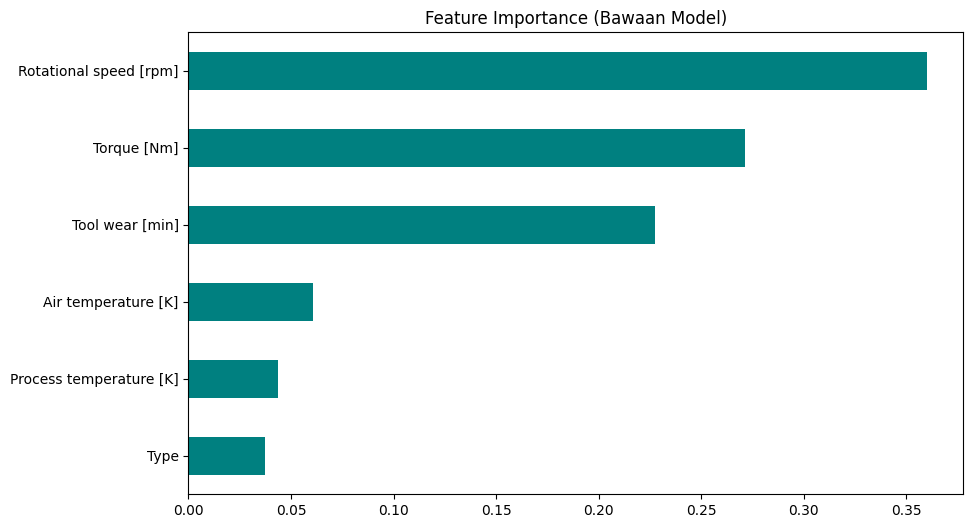

In [5]:
# Plot Feature Importance Bawaan (Permutation/Gini)
if hasattr(best_model, 'feature_importances_'):
  plt.figure(figsize=(10, 6))
  importances = pd.Series(best_model.feature_importances_, index=feature_names)
  importances.sort_values().plot(kind='barh', color='teal')
  plt.title('Feature Importance (Bawaan Model)')
  plt.show()

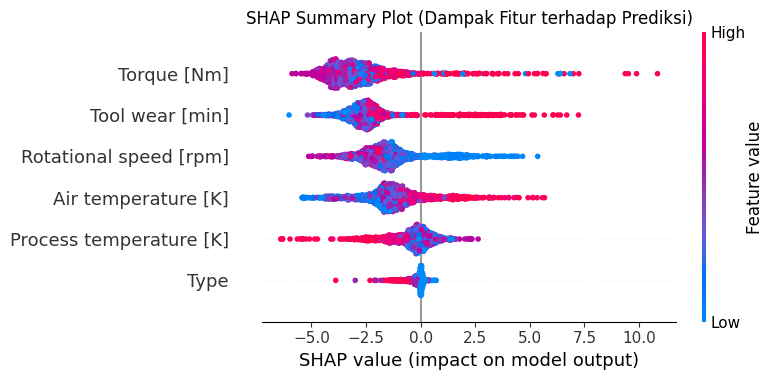

In [6]:
# Gunakan TreeExplainer karena kita pakai Random Forest / XGBoost
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Visualisasi Summary Plot
plt.title("SHAP Summary Plot (Dampak Fitur terhadap Prediksi)")
# Untuk XGBoost/RF Binary, shap_values mungkin berupa list, ambil index 1 (positive class)
if isinstance(shap_values, list):
  shap.summary_plot(shap_values[1], X_test, feature_names=feature_names)
else:
  shap.summary_plot(shap_values, X_test, feature_names=feature_names)